In [1]:
import seaborn as sns
import pandas as pd
sns.set(font_scale=1.5)
import matplotlib.pyplot as plt
import numpy as np
from sklearn import linear_model
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import StandardScaler

from sklearn.pipeline import Pipeline

In [24]:
# set numpy random seed so that this notebook is deterministic
np.random.seed(21)

## Linear Classification

In [25]:
iris_data = pd.read_csv("iris.csv")
iris_data.sample(5)

,sepal_length,sepal_width,petal_length,petal_width,species
92,5.8,2.6,4.0,1.2,versicolor
44,5.1,3.8,1.9,0.4,setosa
7,5.0,3.4,1.5,0.2,setosa
21,5.1,3.7,1.5,0.4,setosa
95,5.7,3.0,4.2,1.2,versicolor


<AxesSubplot:xlabel='petal_length', ylabel='petal_width'>

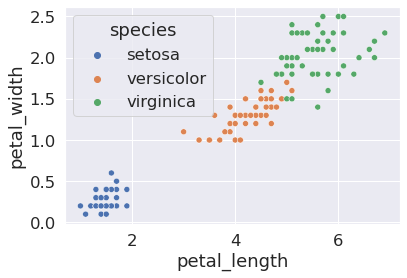

In [26]:
sns.scatterplot(data = iris_data, x = "petal_length", y="petal_width", hue="species")

In [36]:
from sklearn.linear_model import LogisticRegression
logistic_regression_model = LogisticRegression(multi_class = 'ovr')
logistic_regression_model = logistic_regression_model.fit(iris_data[["petal_length", "petal_width"]], iris_data["species"])

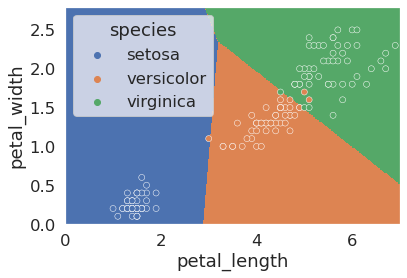

In [37]:
from matplotlib.colors import ListedColormap
sns_cmap = ListedColormap(np.array(sns.color_palette())[0:3, :])

xx, yy = np.meshgrid(np.arange(0, 7, 0.02),
                     np.arange(0, 2.8, 0.02))

Z_string = logistic_regression_model.predict(np.c_[xx.ravel(), yy.ravel()])
categories, Z_int = np.unique(Z_string, return_inverse=True)
Z_int = Z_int 
Z_int = Z_int.reshape(xx.shape)
cs = plt.contourf(xx, yy, Z_int, cmap=sns_cmap)
sns.scatterplot(data = iris_data, x = "petal_length", y="petal_width", hue="species")
plt.xlim(0, 7);
plt.ylim(0, 2.8);

In [46]:
iris_data[["petal_length", "petal_width"]]

,petal_length,petal_width
0,1.4,0.2
1,1.4,0.2
2,1.3,0.2
3,1.5,0.2
4,1.4,0.2
...,...,...
145,5.2,2.3
146,5.0,1.9
147,5.2,2.0
148,5.4,2.3


In [47]:
logistic_regression_model.predict([[1.4, 0.2]])

array(['setosa'], dtype=object)

## Decision Tree Classification

In [40]:
from sklearn import tree
decision_tree_model = tree.DecisionTreeClassifier(criterion='entropy')
decision_tree_model = decision_tree_model.fit(iris_data[["petal_length", "petal_width"]], iris_data["species"])

In [41]:
four_random_rows = iris_data.sample(4)
four_random_rows

,sepal_length,sepal_width,petal_length,petal_width,species
148,6.2,3.4,5.4,2.3,virginica
142,5.8,2.7,5.1,1.9,virginica
113,5.7,2.5,5.0,2.0,virginica
4,5.0,3.6,1.4,0.2,setosa


In [42]:
decision_tree_model.predict(four_random_rows[["petal_length", "petal_width"]])

array(['virginica', 'virginica', 'virginica', 'setosa'], dtype=object)

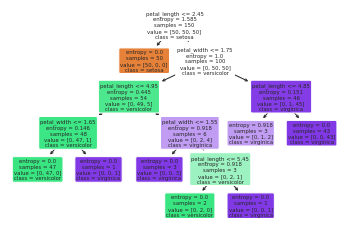

In [43]:
tree.plot_tree(decision_tree_model, feature_names = ["petal_length", "petal_width"],
              class_names = ["setosa", "versicolor", "virginica"],
              rounded = True, filled = True) 
plt.gcf().savefig('tree-plot.png', dpi = 300, bbox_inches = "tight")

In [44]:
import graphviz 

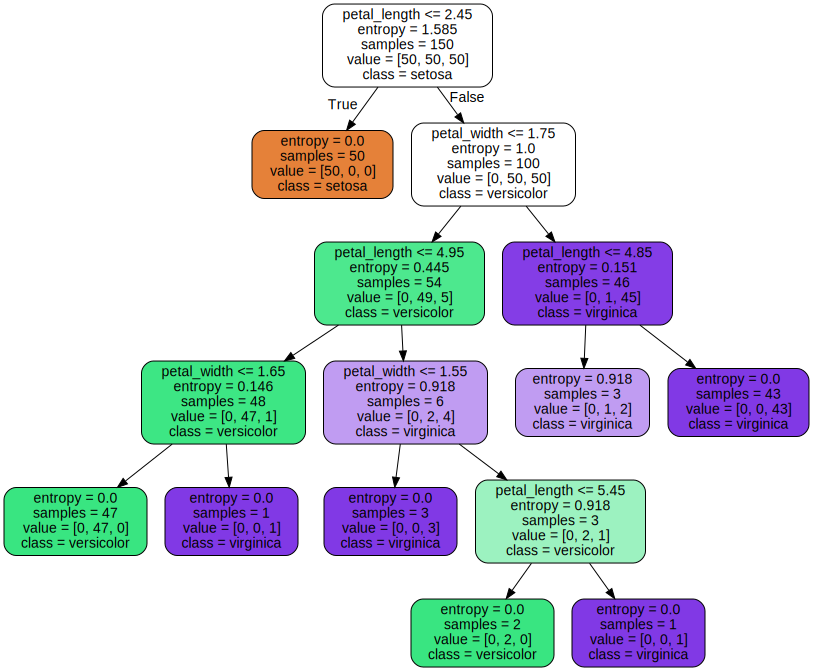

In [46]:
import graphviz
dot_data = tree.export_graphviz(decision_tree_model, out_file=None, 
                      feature_names=["petal_length", "petal_width"],  
                      class_names=["setosa", "versicolor", "virginica"],  
                      filled=True, rounded=True)  
graph = graphviz.Source(dot_data)
graph.render(format="png", filename="iris_tree")
graph

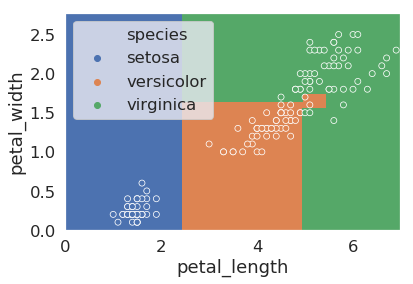

In [32]:
from matplotlib.colors import ListedColormap
sns_cmap = ListedColormap(np.array(sns.color_palette())[0:3, :])

xx, yy = np.meshgrid(np.arange(0, 7, 0.02),
                     np.arange(0, 2.8, 0.02))

Z_string = decision_tree_model.predict(np.c_[xx.ravel(), yy.ravel()])
categories, Z_int = np.unique(Z_string, return_inverse=True)
Z_int = Z_int 
Z_int = Z_int.reshape(xx.shape)
cs = plt.contourf(xx, yy, Z_int, cmap=sns_cmap)
sns.scatterplot(data = iris_data, x = "petal_length", y="petal_width", hue="species")
#fig = plt.gcf()
#fig.savefig("iris_decision_boundaries.png", dpi=300, bbox_inches = "tight")

In [33]:
from sklearn.metrics import accuracy_score
predictions = decision_tree_model.predict(iris_data[["petal_length", "petal_width"]])
accuracy_score(predictions, iris_data["species"])

0.9933333333333333

In [34]:
iris_data.query("petal_length > 2.45 and petal_width > 1.75 and petal_length <= 4.85")

,sepal_length,sepal_width,petal_length,petal_width,species
70,5.9,3.2,4.8,1.8,versicolor
126,6.2,2.8,4.8,1.8,virginica
138,6.0,3.0,4.8,1.8,virginica


## Overfitting

Qualitative look

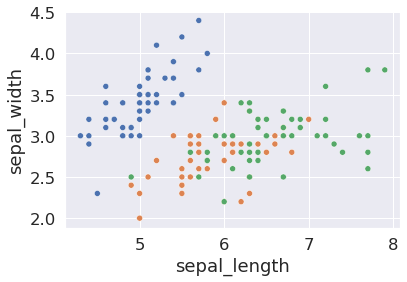

In [47]:
sns.scatterplot(data = iris_data, x = "sepal_length", y="sepal_width", hue="species", legend=False)
fig = plt.gcf()
fig.savefig("iris_scatter_plot_all_150_points_sepal_only.png", dpi=300, bbox_inches = "tight")

/home/hug/miniconda3/envs/ds/lib/python3.8/site-packages/sklearn/base.py:441: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


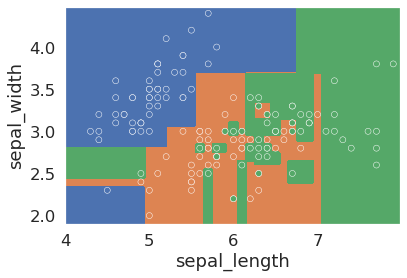

In [51]:
sepal_decision_tree_model = tree.DecisionTreeClassifier()
sepal_decision_tree_model = decision_tree_model.fit(iris_data[["sepal_length", "sepal_width"]], iris_data["species"])
sns_cmap = ListedColormap(np.array(sns.color_palette())[0:3, :])

xx, yy = np.meshgrid(np.arange(4, 8, 0.02),
                     np.arange(1.9, 4.5, 0.02))

Z_string = sepal_decision_tree_model.predict(np.c_[xx.ravel(), yy.ravel()])
categories, Z_int = np.unique(Z_string, return_inverse=True)
Z_int = Z_int 
Z_int = Z_int.reshape(xx.shape)
cs = plt.contourf(xx, yy, Z_int, cmap=sns_cmap)
sns.scatterplot(data = iris_data, x = "sepal_length", y="sepal_width", hue="species", legend=False)
fig = plt.gcf()
fig.savefig("iris_sepal_decision_boundaries_all_150_points.png", dpi=300, bbox_inches = "tight")

In [35]:
train_iris_data, test_iris_data = np.split(iris_data.sample(frac=1), [110])

In [36]:
#sort so that the color labels match what we had in the earlier part of lecture
train_iris_data = train_iris_data.sort_values(by="species")
test_iris_data = test_iris_data.sort_values(by="species")

In [37]:
len(train_iris_data)

110

In [38]:
train_iris_data.head(5)

,sepal_length,sepal_width,petal_length,petal_width,species
46,5.1,3.8,1.6,0.2,setosa
15,5.7,4.4,1.5,0.4,setosa
34,4.9,3.1,1.5,0.1,setosa
24,4.8,3.4,1.9,0.2,setosa
37,4.9,3.1,1.5,0.1,setosa


In [39]:
from sklearn import tree
decision_tree_model = tree.DecisionTreeClassifier()
decision_tree_model = decision_tree_model.fit(train_iris_data[["petal_length", "petal_width"]], train_iris_data["species"])

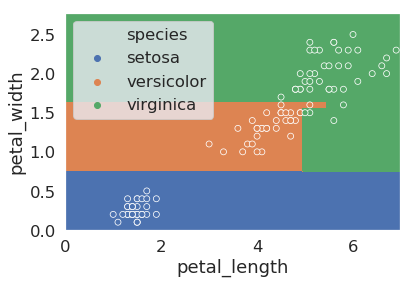

In [40]:
from matplotlib.colors import ListedColormap
sns_cmap = ListedColormap(np.array(sns.color_palette())[0:3, :])

xx, yy = np.meshgrid(np.arange(0, 7, 0.02),
                     np.arange(0, 2.8, 0.02))

Z_string = decision_tree_model.predict(np.c_[xx.ravel(), yy.ravel()])
categories, Z_int = np.unique(Z_string, return_inverse=True)
Z_int = Z_int 
Z_int = Z_int.reshape(xx.shape)
cs = plt.contourf(xx, yy, Z_int, cmap=sns_cmap)
sns.scatterplot(data = train_iris_data, x = "petal_length", y="petal_width", hue="species")
#fig = plt.gcf()
#fig.savefig("iris_decision_boundaries_model_train_test_split_training_only.png", dpi=300, bbox_inches = "tight")

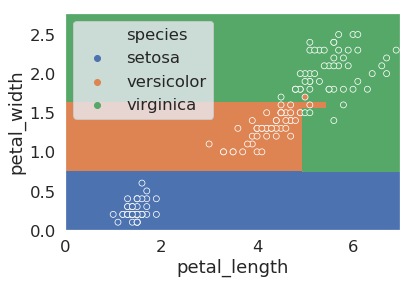

In [41]:
from matplotlib.colors import ListedColormap
sns_cmap = ListedColormap(np.array(sns.color_palette())[0:3, :])

xx, yy = np.meshgrid(np.arange(0, 7, 0.02),
                     np.arange(0, 2.8, 0.02))

Z_string = decision_tree_model.predict(np.c_[xx.ravel(), yy.ravel()])
categories, Z_int = np.unique(Z_string, return_inverse=True)
Z_int = Z_int 
Z_int = Z_int.reshape(xx.shape)
cs = plt.contourf(xx, yy, Z_int, cmap=sns_cmap)
sns.scatterplot(data = iris_data, x = "petal_length", y="petal_width", hue="species")
#fig = plt.gcf()
#fig.savefig("iris_decision_boundaries_model_train_test_split.png", dpi=300, bbox_inches = "tight")

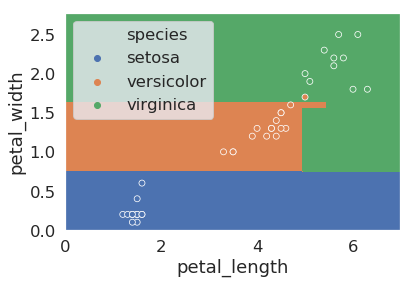

In [42]:
from matplotlib.colors import ListedColormap
sns_cmap = ListedColormap(np.array(sns.color_palette())[0:3, :])

xx, yy = np.meshgrid(np.arange(0, 7, 0.02),
                     np.arange(0, 2.8, 0.02))

Z_string = decision_tree_model.predict(np.c_[xx.ravel(), yy.ravel()])
categories, Z_int = np.unique(Z_string, return_inverse=True)
Z_int = Z_int 
Z_int = Z_int.reshape(xx.shape)
cs = plt.contourf(xx, yy, Z_int, cmap=sns_cmap)
sns.scatterplot(data = test_iris_data, x = "petal_length", y="petal_width", hue="species")
#fig = plt.gcf()
#fig.savefig("iris_decision_boundaries_model_train_test_split_test_only.png", dpi=300, bbox_inches = "tight")

In [43]:
accuracy_score(decision_tree_model.predict(train_iris_data[["petal_length", "petal_width"]]), train_iris_data["species"])

0.990909090909091

In [44]:
predictions = decision_tree_model.predict(test_iris_data[["petal_length", "petal_width"]])
accuracy_score(predictions, test_iris_data["species"])

0.975

In [45]:
from sklearn import tree
sepal_decision_tree_model = tree.DecisionTreeClassifier()
sepal_decision_tree_model = decision_tree_model.fit(train_iris_data[["sepal_length", "sepal_width"]], train_iris_data["species"])

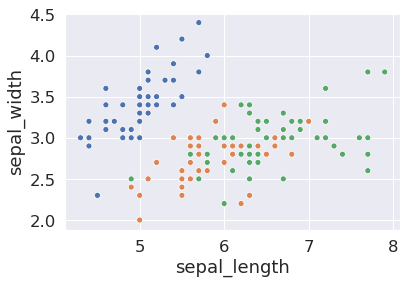

In [46]:
sns.scatterplot(data = iris_data, x = "sepal_length", y="sepal_width", hue="species", legend=False)
fig = plt.gcf()
fig.savefig("iris_scatter_plot_with_petal_data_sepal_only.png", dpi=300, bbox_inches = "tight")

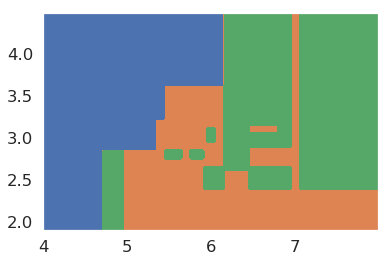

In [47]:
from matplotlib.colors import ListedColormap
sns_cmap = ListedColormap(np.array(sns.color_palette())[0:3, :])

xx, yy = np.meshgrid(np.arange(4, 8, 0.02),
                     np.arange(1.9, 4.5, 0.02))

Z_string = sepal_decision_tree_model.predict(np.c_[xx.ravel(), yy.ravel()])
categories, Z_int = np.unique(Z_string, return_inverse=True)
Z_int = Z_int 
Z_int = Z_int.reshape(xx.shape)
cs = plt.contourf(xx, yy, Z_int, cmap=sns_cmap)
fig = plt.gcf()
fig.savefig("iris_sepal_decision_boundaries_no_data.png", dpi=300, bbox_inches = "tight")

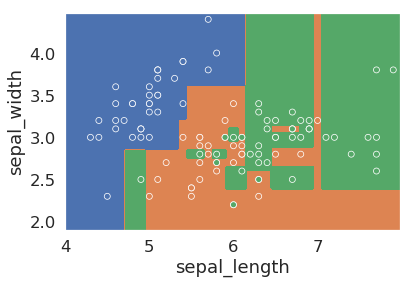

In [48]:
from matplotlib.colors import ListedColormap
sns_cmap = ListedColormap(np.array(sns.color_palette())[0:3, :])

xx, yy = np.meshgrid(np.arange(4, 8, 0.02),
                     np.arange(1.9, 4.5, 0.02))

Z_string = sepal_decision_tree_model.predict(np.c_[xx.ravel(), yy.ravel()])
categories, Z_int = np.unique(Z_string, return_inverse=True)
Z_int = Z_int 
Z_int = Z_int.reshape(xx.shape)
cs = plt.contourf(xx, yy, Z_int, cmap=sns_cmap)
sns.scatterplot(data = train_iris_data, x = "sepal_length", y="sepal_width", hue="species", legend=False)
fig = plt.gcf()
fig.savefig("iris_sepal_decision_boundaries_model_training_only.png", dpi=300, bbox_inches = "tight")

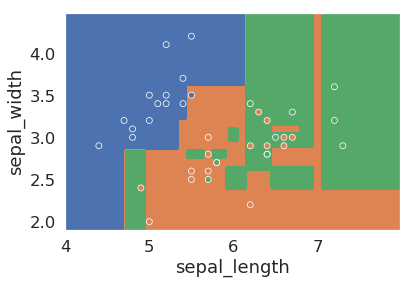

In [49]:
from matplotlib.colors import ListedColormap
sns_cmap = ListedColormap(np.array(sns.color_palette())[0:3, :])

xx, yy = np.meshgrid(np.arange(4, 8, 0.02),
                     np.arange(1.9, 4.5, 0.02))

Z_string = sepal_decision_tree_model.predict(np.c_[xx.ravel(), yy.ravel()])
categories, Z_int = np.unique(Z_string, return_inverse=True)
Z_int = Z_int 
Z_int = Z_int.reshape(xx.shape)
cs = plt.contourf(xx, yy, Z_int, cmap=sns_cmap)
sns.scatterplot(data = test_iris_data, x = "sepal_length", y="sepal_width", hue="species", legend=False)
fig = plt.gcf()
fig.savefig("iris_sepal_decision_boundaries_model_test_only.png", dpi=300, bbox_inches = "tight")
#fig = plt.gcf()
#fig.savefig("iris_decision_boundaries_model_train_test_split.png", dpi=300, bbox_inches = "tight")

In [50]:
dot_data = tree.export_graphviz(sepal_decision_tree_model, out_file=None, 
                      feature_names=["sepal_length", "sepal_width"],  
                      class_names=["setosa", "versicolor", "virginica"],  
                      filled=True, rounded=True,  
                      special_characters=True)  
graph = graphviz.Source(dot_data)
graph.render(format="png", filename="sepal_tree")
#graph

'sepal_tree.png'

In [51]:
accuracy_score(sepal_decision_tree_model.predict(train_iris_data[["sepal_length", "sepal_width"]]), train_iris_data["species"])

0.9363636363636364

In [52]:
accuracy_score(sepal_decision_tree_model.predict(test_iris_data[["sepal_length", "sepal_width"]]), test_iris_data["species"])

0.725

In [53]:
decision_tree_model_4d = tree.DecisionTreeClassifier()
decision_tree_model_4d = decision_tree_model_4d.fit(train_iris_data[["petal_length", "petal_width", 
                                                                     "sepal_length", "sepal_width"]], train_iris_data["species"])

In [54]:
predictions = decision_tree_model_4d.predict(train_iris_data[["petal_length", "petal_width", "sepal_length", "sepal_width"]])
accuracy_score(predictions, train_iris_data["species"])

1.0

In [55]:
predictions = decision_tree_model_4d.predict(test_iris_data[["petal_length", "petal_width", "sepal_length", "sepal_width"]])
accuracy_score(predictions, test_iris_data["species"])

0.975

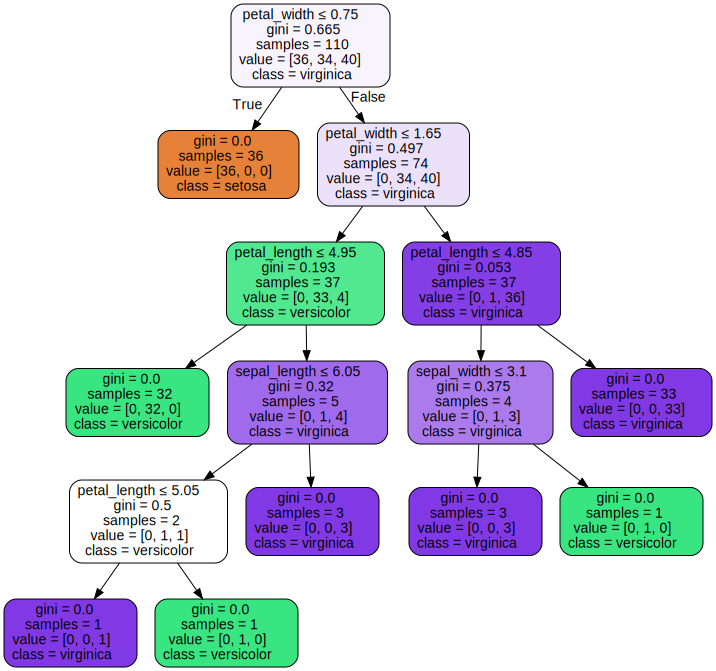

In [56]:
dot_data = tree.export_graphviz(decision_tree_model_4d, out_file=None, 
                      feature_names=["petal_length", "petal_width", "sepal_length", "sepal_width"],  
                      class_names=["setosa", "versicolor", "virginica"],  
                      filled=True, rounded=True,  
                      special_characters=True)  
graph = graphviz.Source(dot_data)
graph

In [57]:
graph.render(format="png", filename="iris_4d_tree")

'iris_4d_tree.png'

### Creating Decision Trees

In [60]:
iris_data.query("petal_width >= 1.5")["species"].value_counts()

virginica     49
versicolor    15
Name: species, dtype: int64

In [69]:
iris_data.query("petal_length >= 4")["species"].value_counts()

virginica     50
versicolor    39
Name: species, dtype: int64

In [70]:
iris_data.query("petal_width >= 0.5")["species"].value_counts()

virginica     50
versicolor    50
setosa         2
Name: species, dtype: int64

In [71]:
iris_data.query("petal_width >= 0.8")["species"].value_counts()

virginica     50
versicolor    50
Name: species, dtype: int64

In [72]:
def entropy(x):
    normalized_x = x / np.sum(x)
    return sum(-normalized_x * np.log2(normalized_x))

In [73]:
-np.log2(0.33)*0.33

0.5278224832373695

In [74]:
-np.log2(0.36)*0.36

0.5306152277996684

In [75]:
entropy([34, 36, 40])

1.581649163979848

In [76]:
entropy([149, 1, 1])

0.11485434496175385

In [77]:
entropy([50, 50])

1.0

In [78]:
entropy([50, 50, 50])

1.584962500721156

In [79]:
entropy([31, 4, 1])

0.6815892897202809

In [66]:
#entropy([50, 46, 3])
#entropy([4, 47])
#entropy([41, 50])
#entropy([50, 50])

In [81]:
def weighted_average_entropy(x1, x2):
    N1 = sum(x1)
    N2 = sum(x2)
    N = N1/(N1 + N2)
    print(f"entropy(x1): {entropy(x1)}")
    print(f"entropy(x2): {entropy(x2)}")
    return (N1 * entropy(x1) + N2 * entropy(x2)) / (N1 + N2)

In [84]:
weighted_average_entropy([50, 35, 1], [15, 49])

entropy(x1): 1.0574541142159344
entropy(x2): 0.7855602922535472


0.9414460835119826

In [85]:
weighted_average_entropy([50, 11], [39, 50])

entropy(x1): 0.6807937753703206
entropy(x2): 0.9889525767600615


0.8636346641949003

In [70]:
weighted_average_entropy([2, 50, 50], [48])

0.761345106024134

In [71]:
weighted_average_entropy([50, 50], [50])

0.6666666666666666

### Annotating the Tree

In [88]:
weighted_average_entropy([50], [50, 50])

entropy(x1): 0.0
entropy(x2): 1.0


0.6666666666666666

In [89]:
weighted_average_entropy([49, 5], [1, 45])

entropy(x1): 0.44506485705083865
entropy(x2): 0.15109697051711368


0.3098396292453252

In [90]:
weighted_average_entropy([47, 1], [2, 4])

entropy(x1): 0.1460942501201363
entropy(x2): 0.9182958340544896


0.23189442611284222

In [91]:
weighted_average_entropy([1, 2], [43])

entropy(x1): 0.9182958340544896
entropy(x2): 0.0


0.059888858742684105

### Or Delta WS

In [ ]:
def delta_ws():
    N1 = sum(x1)
    N2 = sum(x2)
    N = N1/(N1 + N2)
    print(f"entropy(x1): {entropy(x1)}")
    print(f"entropy(x2): {entropy(x2)}")
    return (N1 * entropy(x1) + N2 * entropy(x2)) / (N1 + N2)

### Random Forests

In [103]:
ten_decision_tree_models = []
ten_training_sets = []
for i in range(10):
    current_model = tree.DecisionTreeClassifier()
    temp_iris_training_data, temp_iris_test_data = np.split(iris_data.sample(frac=1), [110])
    temp_iris_training_data = temp_iris_training_data.sort_values("species")
    current_model.fit(temp_iris_training_data[["sepal_length", "sepal_width"]], temp_iris_training_data["species"])
    ten_decision_tree_models.append(current_model)
    ten_training_sets.append(temp_iris_training_data)

In [156]:
def plot_decision_tree(decision_tree_model, data = None, disable_axes = False):
    from matplotlib.colors import ListedColormap
    sns_cmap = ListedColormap(np.array(sns.color_palette())[0:3, :])

    xx, yy = np.meshgrid(np.arange(4, 8, 0.02),
                     np.arange(1.9, 4.5, 0.02))

    Z_string = decision_tree_model.predict(np.c_[xx.ravel(), yy.ravel()])
    categories, Z_int = np.unique(Z_string, return_inverse=True)
    Z_int = Z_int.reshape(xx.shape)
    cs = plt.contourf(xx, yy, Z_int, cmap=sns_cmap)
    if data is not None:
        sns.scatterplot(data = data, x = "sepal_length", y="sepal_width", hue="species", legend=False)

    if disable_axes:
        plt.axis("off")
#    if disable_axes:
#        
#        plt.gca().xaxis.label.set_visible(False)
#        plt.gca().yaxis.label.set_visible(False)        

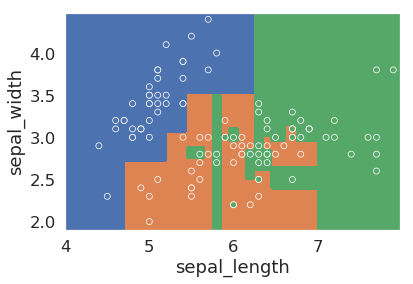

In [142]:
m_num = 0
plot_decision_tree(ten_decision_tree_models[m_num], ten_training_sets[m_num])
plt.savefig("random_forest_model_1_example.png", dpi = 300, bbox_inches = "tight")

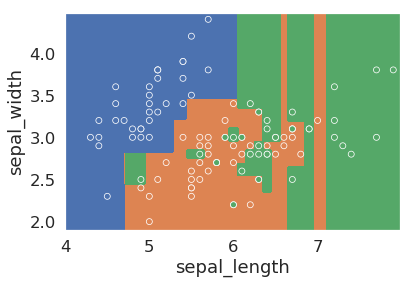

In [143]:
m_num = 7
plot_decision_tree(ten_decision_tree_models[m_num], ten_training_sets[m_num])
plt.savefig("random_forest_model_2_example.png", dpi = 300, bbox_inches = "tight")

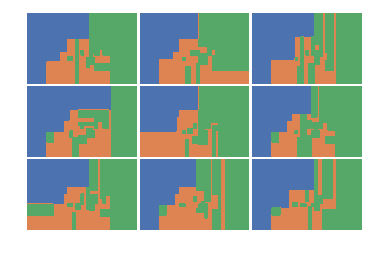

In [160]:
import matplotlib.gridspec as gridspec
gs1 = gridspec.GridSpec(3, 3)
gs1.update(wspace=0.025, hspace=0.025) # set the spacing between axes. 

for i in range(0, 9):
    plt.subplot(gs1[i]) #3, 3, i)
    plot_decision_tree(ten_decision_tree_models[i], None, True)    
    
plt.savefig("random_forest_model_9_examples.png", dpi = 300, bbox_inches = "tight")    